This project contains a fare prediction model using airline data. The dataset is attached in the repository.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train_df = pd.read_csv("data_train.csv")

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Since there is only 1 missing value in categorical variable,we drop it

In [12]:
train_df.dropna(inplace=True)

In [13]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

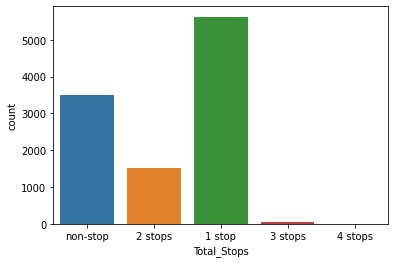

In [14]:
sns.countplot(x="Total_Stops",data=train_df)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

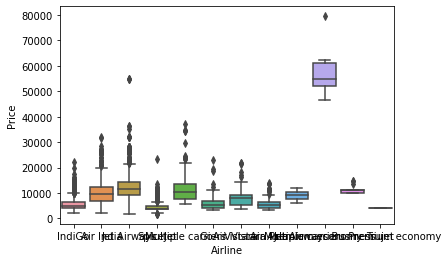

In [15]:
sns.boxplot(x="Airline",y="Price",data=train_df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

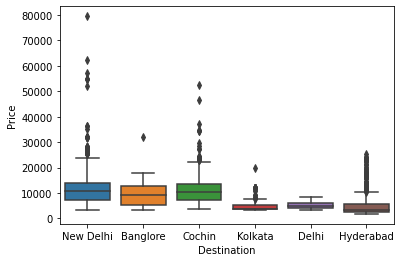

In [16]:
sns.boxplot(x="Destination",y="Price",data=train_df)

We confirm presence of outliers in Price

In [17]:
train_df = pd.get_dummies(data=train_df,columns=["Airline","Source","Destination"],drop_first=True)

In [18]:
train_df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
def change(col):
    train_df[col]=pd.to_datetime(train_df[col])

In [20]:
train_df.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [21]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change(i)

In [22]:
train_df.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2019-03-24,BLR → DEL,2021-02-17 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2019-01-05,CCU → IXR → BBI → BLR,2021-02-17 05:50:00,2021-02-17 13:15:00,7h 25m,2 stops,No info,7662,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2019-09-06,DEL → LKO → BOM → COK,2021-02-17 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2019-12-05,CCU → NAG → BLR,2021-02-17 18:05:00,2021-02-17 23:30:00,5h 25m,1 stop,No info,6218,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2019-01-03,BLR → NAG → DEL,2021-02-17 16:50:00,2021-02-17 21:35:00,4h 45m,1 stop,No info,13302,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
train_df["Journey_day"] = train_df['Date_of_Journey'].dt.day
train_df["Journey_month"] = train_df['Date_of_Journey'].dt.month
train_df["Journey_year"] = train_df['Date_of_Journey'].dt.year

In [24]:
del train_df['Date_of_Journey']

In [25]:
def extract_hr(col):
    train_df[col+"hr"] = train_df[col].dt.hour
    
def extract_min(col):
    train_df[col+"min"] = train_df[col].dt.minute

In [26]:
for col in ['Dep_Time','Arrival_Time']:
    extract_hr(col)
    extract_min(col)
    del train_df[col]

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Route                                      10682 non-null  object
 1   Duration                                   10682 non-null  object
 2   Total_Stops                                10682 non-null  object
 3   Additional_Info                            10682 non-null  object
 4   Price                                      10682 non-null  int64 
 5   Airline_Air India                          10682 non-null  uint8 
 6   Airline_GoAir                              10682 non-null  uint8 
 7   Airline_IndiGo                             10682 non-null  uint8 
 8   Airline_Jet Airways                        10682 non-null  uint8 
 9   Airline_Jet Airways Business               10682 non-null  uint8 
 10  Airline_Multiple carriers         

In [28]:
train_df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Journey_year,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin
0,BLR → DEL,2h 50m,non-stop,No info,3897,0,0,1,0,0,...,0,0,1,24,3,2019,22,20,1,10
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,0,0,0,0,...,0,0,0,5,1,2019,5,50,13,15
2,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,0,0,0,1,0,...,0,0,0,6,9,2019,9,25,4,25
3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,0,0,1,0,0,...,0,0,0,5,12,2019,18,5,23,30
4,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,0,0,1,0,0,...,0,0,1,3,1,2019,16,50,21,35


In [29]:
for i in range(4):
    train_df["route"+str(i+1)] = train_df["Route"].str.split("→").str[i]

In [30]:
train_df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Journey_month,Journey_year,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4
0,BLR → DEL,2h 50m,non-stop,No info,3897,0,0,1,0,0,...,3,2019,22,20,1,10,BLR,DEL,NaN,NaN
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,0,0,0,0,...,1,2019,5,50,13,15,CCU,IXR,BBI,BLR
2,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,0,0,0,1,0,...,9,2019,9,25,4,25,DEL,LKO,BOM,COK
3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,0,0,1,0,0,...,12,2019,18,5,23,30,CCU,NAG,BLR,NaN
4,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,0,0,1,0,0,...,1,2019,16,50,21,35,BLR,NAG,DEL,NaN


In [31]:
del train_df["Route"]

In [32]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [33]:
train_df["route1"].fillna("None",inplace=True)

In [34]:
train_df["route2"].fillna("None",inplace=True)
train_df["route3"].fillna("None",inplace=True)
train_df["route4"].fillna("None",inplace=True)

In [35]:
train_df.head()

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Journey_month,Journey_year,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4
0,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,...,3,2019,22,20,1,10,BLR,DEL,None,None
1,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,...,1,2019,5,50,13,15,CCU,IXR,BBI,BLR
2,19h,2 stops,No info,13882,0,0,0,1,0,0,...,9,2019,9,25,4,25,DEL,LKO,BOM,COK
3,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,...,12,2019,18,5,23,30,CCU,NAG,BLR,None
4,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,...,1,2019,16,50,21,35,BLR,NAG,DEL,None


In [36]:
duration = list(train_df["Duration"])
for i in range(len(duration)):
    x = duration[i].split()
    if len(x)==2:
        pass
    else:
        if 'h' in x[0]:
            duration[i] = duration[i]+" "+"0m"
        else:
            duration[i] = "0h"+" "+duration[i]
train_df["Duration"] = duration

In [37]:
train_df.head()

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Journey_month,Journey_year,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4
0,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,...,3,2019,22,20,1,10,BLR,DEL,None,None
1,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,...,1,2019,5,50,13,15,CCU,IXR,BBI,BLR
2,19h 0m,2 stops,No info,13882,0,0,0,1,0,0,...,9,2019,9,25,4,25,DEL,LKO,BOM,COK
3,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,...,12,2019,18,5,23,30,CCU,NAG,BLR,None
4,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,...,1,2019,16,50,21,35,BLR,NAG,DEL,None


In [38]:
def hrs(x):
    return x.split()[0][0:-1]
def mins(x):
    return x.split()[1][0:-1]

In [39]:
train_df["Duration_hrs"] = train_df["Duration"].apply(hrs)
train_df["Duration_mins"] = train_df["Duration"].apply(mins)

In [40]:
train_df.head()

,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4,Duration_hrs,Duration_mins
0,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,...,22,20,1,10,BLR,DEL,None,None,2,50
1,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,...,5,50,13,15,CCU,IXR,BBI,BLR,7,25
2,19h 0m,2 stops,No info,13882,0,0,0,1,0,0,...,9,25,4,25,DEL,LKO,BOM,COK,19,0
3,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,...,18,5,23,30,CCU,NAG,BLR,None,5,25
4,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,...,16,50,21,35,BLR,NAG,DEL,None,4,45


In [41]:
del train_df["Duration"]

In [42]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [43]:
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [44]:
train_df["Total_Stops"] = train_df["Total_Stops"].map(dict)

In [45]:
train_df.head()

,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4,Duration_hrs,Duration_mins
0,0,No info,3897,0,0,1,0,0,0,0,...,22,20,1,10,BLR,DEL,None,None,2,50
1,2,No info,7662,1,0,0,0,0,0,0,...,5,50,13,15,CCU,IXR,BBI,BLR,7,25
2,2,No info,13882,0,0,0,1,0,0,0,...,9,25,4,25,DEL,LKO,BOM,COK,19,0
3,1,No info,6218,0,0,1,0,0,0,0,...,18,5,23,30,CCU,NAG,BLR,None,5,25
4,1,No info,13302,0,0,1,0,0,0,0,...,16,50,21,35,BLR,NAG,DEL,None,4,45


In [46]:
train_df.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Timehr', 'Dep_Timemin',
       'Arrival_Timehr', 'Arrival_Timemin', 'route1', 'route2', 'route3',
       'route4', 'Duration_hrs', 'Duration_mins'],
      dtype='object')

In [47]:
add = list(train_df["Additional_Info"])

In [48]:
del train_df["Additional_Info"]
del train_df["Journey_year"]

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lb = LabelEncoder()
for i in ['route1', 'route2', 'route3','route4']:
    train_df[i] = lb.fit_transform(train_df[i])

In [51]:
train_df.head()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4,Duration_hrs,Duration_mins
0,0,3897,0,0,1,0,0,0,0,0,...,22,20,1,10,0,13,29,13,2,50
1,2,7662,1,0,0,0,0,0,0,0,...,5,50,13,15,2,25,1,3,7,25
2,2,13882,0,0,0,1,0,0,0,0,...,9,25,4,25,3,32,4,5,19,0
3,1,6218,0,0,1,0,0,0,0,0,...,18,5,23,30,2,34,3,13,5,25
4,1,13302,0,0,1,0,0,0,0,0,...,16,50,21,35,0,34,8,13,4,45


In [52]:
train_df.shape

(10682, 34)

<AxesSubplot:xlabel='Price'>

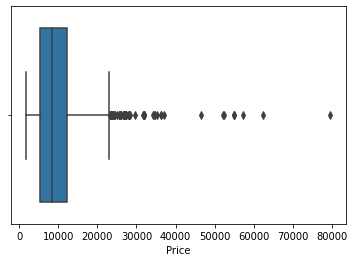

In [53]:
sns.boxplot(x="Price",data = train_df)

In [54]:
train_df["Price"] = np.where(train_df["Price"]>=40000,train_df["Price"].median(),train_df["Price"])

In [55]:
x = train_df.drop("Price",axis=1)

In [56]:
x.shape

(10682, 33)

In [57]:
y = train_df["Price"]

In [58]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [59]:
from sklearn.feature_selection import mutual_info_classif

In [60]:
train_df.corr()

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,...,Journey_day,Journey_month,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,route1,route2,route3,route4
Total_Stops,1.000000,0.629704,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,...,-0.024136,0.065495,-0.061476,-0.002618,0.038140,-0.106940,0.428918,0.162259,-0.800261,-0.729391
Price,0.629704,1.000000,0.057157,-0.098735,-0.374937,0.438216,-0.003642,0.150260,0.018878,-0.309010,...,-0.166965,0.022040,0.006999,-0.032789,0.030714,-0.090363,0.202811,-0.088033,-0.616544,-0.332204
Airline_Air India,0.271094,0.057157,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,...,-0.037279,-0.000281,-0.012879,-0.045688,0.088872,0.061231,-0.007952,0.156370,-0.036504,-0.395179
Airline_GoAir,-0.060110,-0.098735,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,-0.039166,...,0.002350,-0.017538,-0.016373,0.076751,0.018526,0.096839,-0.066119,-0.046077,0.040626,0.055727
Airline_IndiGo,-0.302991,-0.374937,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,-0.140464,...,0.013223,-0.037203,-0.023395,-0.014714,-0.071491,0.035124,-0.041125,0.062839,0.288130,0.187449
Airline_Jet Airways,0.215063,0.438216,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,-0.026199,-0.216132,...,-0.028387,0.057818,0.113942,0.024455,-0.027377,-0.057698,-0.045845,-0.085982,-0.304316,-0.056601
Airline_Jet Airways Business,0.017876,-0.003642,-0.010497,-0.003224,-0.011563,-0.017793,1.000000,-0.008418,-0.000828,-0.006827,...,-0.026075,-0.026727,-0.007524,0.009168,-0.014456,0.005232,-0.020035,-0.007594,-0.013771,-0.011731
Airline_Multiple carriers,0.118399,0.150260,-0.157223,-0.048292,-0.173196,-0.266497,-0.008418,1.000000,-0.012395,-0.102253,...,0.048638,-0.002737,-0.149992,-0.109370,0.067930,-0.167455,0.288677,-0.130123,-0.219070,0.103596
Airline_Multiple carriers Premium economy,0.009089,0.018878,-0.015456,-0.004747,-0.017026,-0.026199,-0.000828,-0.012395,1.000000,-0.010052,...,0.032978,-0.029617,-0.028672,-0.004624,0.013491,-0.001786,0.028379,-0.021355,-0.022337,0.014303
Airline_SpiceJet,-0.274351,-0.309010,-0.127510,-0.039166,-0.140464,-0.216132,-0.006827,-0.102253,-0.010052,1.000000,...,0.030767,-0.032454,-0.010451,0.092634,-0.090058,0.012543,-0.045780,0.056261,0.291584,0.117995


In [61]:
#mutual_info_classif(x,y)

In [62]:
#cls = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)

In [63]:
#cls.columns = ["impt"] 
#cls.sort_values(by= "impt",ascending=False)

## Model building
Since it is a regression model,we start with linear regression,multiple regression,decison trees and finally use ensemble learning

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state = 1)

In [66]:
from sklearn.metrics import r2_score,mean_squared_error

In [70]:
def predict_model(ml_model):
    model = ml_model.fit(train_x,train_y)
    y_pred = model.predict(test_x)
    print(r2_score(y_pred,test_y))
    print(mean_squared_error(y_pred,test_y))
    sns.distplot(test_y-y_pred)

In [68]:
from sklearn.linear_model import LinearRegression

0.4243814881824447
6912673.202900523


c:\users\shreyas bhoyar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


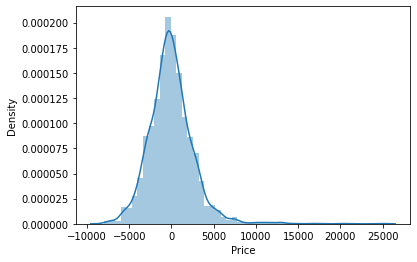

In [71]:
lm = LinearRegression()
predict_model(lm)

In [72]:
from sklearn import tree

In [73]:
tr= tree.DecisionTreeRegressor(max_depth=10)

0.7838507917028096
3632076.3236068296


c:\users\shreyas bhoyar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


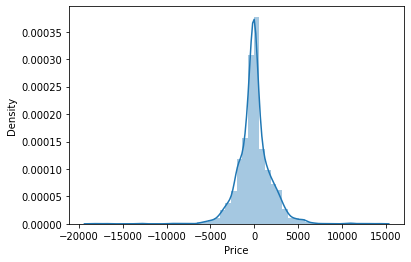

In [74]:
predict_model(tr)

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf=RandomForestRegressor()

0.8084899124943017
3180851.8421757435


c:\users\shreyas bhoyar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


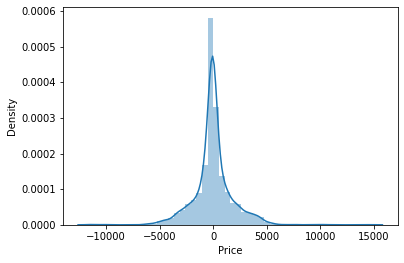

In [77]:
predict_model(rf)